# Run the ./app with different parameters

In [1]:
import os
dims = [100000*2**i for i in range(11)] + [160000000]
# dims = [102400000, 160000000]
ks = [0.001, 0.01, 0.1, 1000, 10000, 100000]

# Plot figures

In [2]:
import matplotlib.pyplot as plt
import numpy as np
nth_enclaves = {}
nth_rams = {}
heap_encalves =  {}
std_nth_enclaves = {}
std_nth_rams = {}
std_heap_encalves = {}    
labels = ["Qselect Enclave", "Min-Heap Enclave", "Qselect RAM"]

In [3]:
for dim in dims:
    nth_enclaves[dim] = {}
    nth_rams[dim] =  {}
    heap_encalves[dim] =  {}
    std_nth_enclaves[dim] = {}
    std_nth_rams[dim] = {}
    std_heap_encalves[dim] = {}
    for k in ks:
        filename = str(dim)+"_"+str(k)+".out"
        f = open(filename, "r")
        lines = f.readlines()
        if dim>100000000 and abs(k-0.1)<1e-3:
            times = 50
        elif dim==102400000 and abs(k-0.01)<1e-3:
            times = 25
        else:
            times = 100
        nth_enclave = []
        nth_ram = []
        heap_enclave = []
        for t in range(times):
            idx = t*15
            l = lines[idx+4]
            nth_enclave.append(float(l[l.find(":")+1:-3])/1000)
            l = lines[idx+8]
            heap_enclave.append(float(l[l.find(":")+1:-3])/1000)
            l = lines[idx+11]
            nth_ram.append(float(l[l.find(":")+1:-3])/1000)
        nth_enclaves[dim][k] = np.mean(nth_enclave)
        nth_rams[dim][k] =  np.mean(nth_ram)
        heap_encalves[dim][k] = np.mean(heap_enclave)
        std_nth_enclaves[dim][k] = np.std(nth_enclave)
        std_nth_rams[dim][k] =  np.std(nth_ram)
        std_heap_encalves[dim][k] = np.std(heap_enclave)

## x-axis: dims

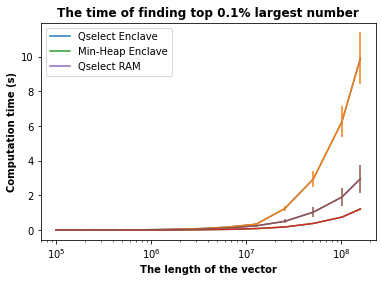

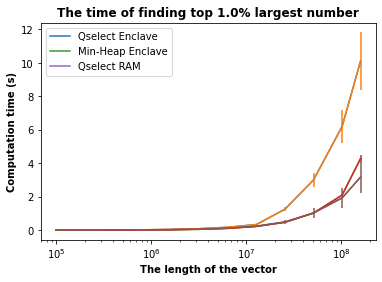

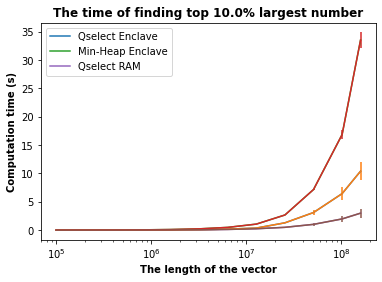

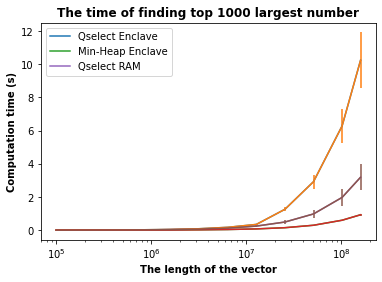

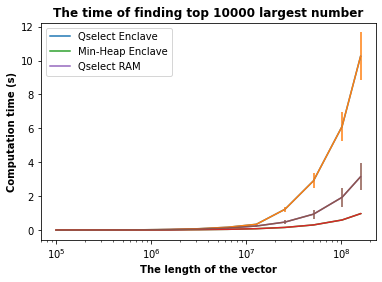

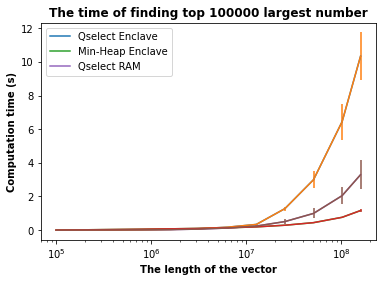

In [4]:
for k in ks:
    y = [[] for i in range(3)]
    e = [[] for i in range(3)]
    for dim in dims:
        y[0].append(nth_enclaves[dim][k])
        y[1].append(heap_encalves[dim][k])
        y[2].append(nth_rams[dim][k])
        e[0].append(std_nth_enclaves[dim][k])
        e[1].append(std_heap_encalves[dim][k])
        e[2].append(std_nth_rams[dim][k])
    plt.figure()
    for i in range(3):
        plt.plot(dims, y[i], label = labels[i])
        plt.errorbar(dims, y[i], e[i])
    plt.xlabel('The length of the vector', fontweight='bold')
    plt.xscale('log')
    # Set the y axis label of the current axis.
    plt.ylabel('Computation time (s)', fontweight='bold')
    if k<1:
        plt.title('The time of finding top '+str(k*100)+"% largest number", fontweight='bold')
    else:
        plt.title('The time of finding top '+str(k)+" largest number", fontweight='bold')
    plt.legend()
    plt.savefig("imgs/")

## x-axis: ks

[100.0, 1000.0, 10000.0, 1000, 10000, 100000]
[100.0, 1000.0, 1000, 10000.0, 10000, 100000]
[0.00065017327, 0.0012252647999999998, 0.005095937410000001, 0.0012346622399999998, 0.00521739412, 0.00047924537000000004]


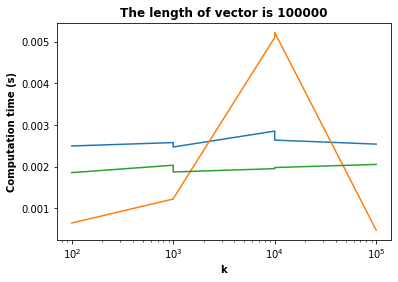

[200.0, 2000.0, 20000.0, 1000, 10000, 100000]
[200.0, 1000, 2000.0, 10000, 20000.0, 100000]
[0.0012752490000000002, 0.00249500064, 0.010868184539999999, 0.0018203999299999999, 0.006763620269999998, 0.019372211020000002]


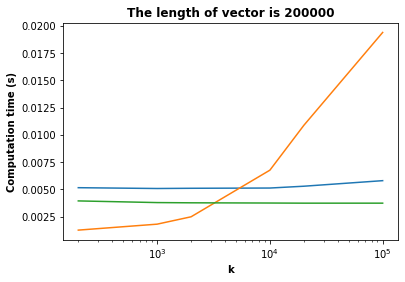

[400.0, 4000.0, 40000.0, 1000, 10000, 100000]
[400.0, 1000, 4000.0, 10000, 40000.0, 100000]
[0.00250508377, 0.0052570954999999996, 0.02273081179, 0.003005264570000001, 0.0091049537, 0.03724244613000001]


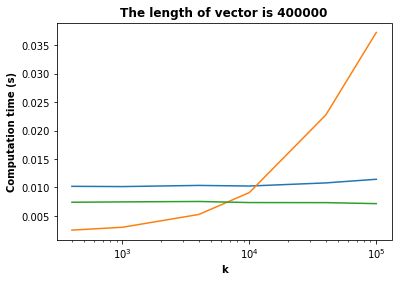

[800.0, 8000.0, 80000.0, 1000, 10000, 100000]
[800.0, 1000, 8000.0, 10000, 80000.0, 100000]
[0.005202379850000001, 0.01110975301, 0.04880364881000001, 0.0053251902000000005, 0.012592476589999997, 0.05613885492999999]


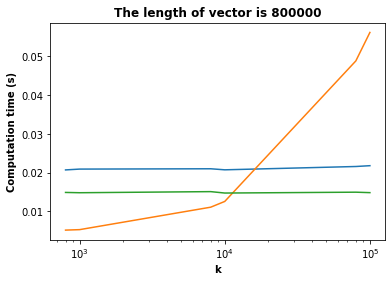

[1600.0, 16000.0, 160000.0, 1000, 10000, 100000]
[1000, 1600.0, 10000, 16000.0, 100000, 160000.0]
[0.01051216141, 0.023450099170000002, 0.10550987464999999, 0.0099623087, 0.018433239480000002, 0.07734970376]


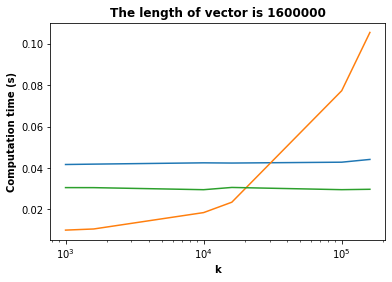

[3200.0, 32000.0, 320000.0, 1000, 10000, 100000]
[1000, 3200.0, 10000, 32000.0, 100000, 320000.0]
[0.021418400969999998, 0.04937298182000001, 0.22624756934, 0.01915876225, 0.028599061510000006, 0.10321108586]


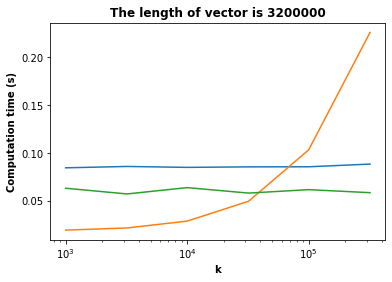

[6400.0, 64000.0, 640000.0, 1000, 10000, 100000]
[1000, 6400.0, 10000, 64000.0, 100000, 640000.0]
[0.043438709539999995, 0.10407168774000003, 0.48388069793999994, 0.03746740933000001, 0.04764338339999999, 0.1376285762]


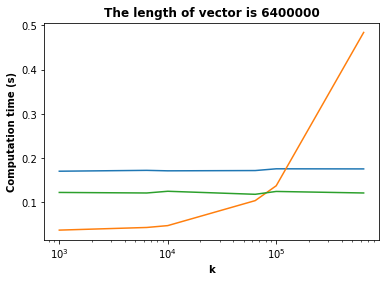

[12800.0, 128000.0, 1280000.0, 1000, 10000, 100000]
[1000, 10000, 12800.0, 100000, 128000.0, 1280000.0]
[0.08955479108999999, 0.22281787859000002, 1.0616029868599999, 0.07440666957, 0.08593424252000002, 0.19271677208]


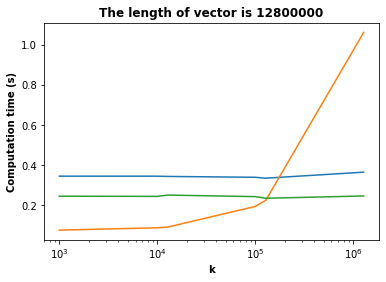

[25600.0, 256000.0, 2560000.0, 1000, 10000, 100000]
[1000, 10000, 25600.0, 100000, 256000.0, 2560000.0]
[0.18084123311, 0.46906348681999993, 2.67130031297, 0.14704505775, 0.15958413646, 0.29124088959]


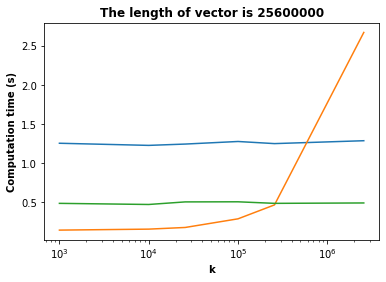

[51200.0, 512000.0, 5120000.0, 1000, 10000, 100000]
[1000, 10000, 51200.0, 100000, 512000.0, 5120000.0]
[0.38649197697000004, 1.0210550291799998, 7.164175138070001, 0.29441880297999995, 0.30740581081, 0.44408473349]


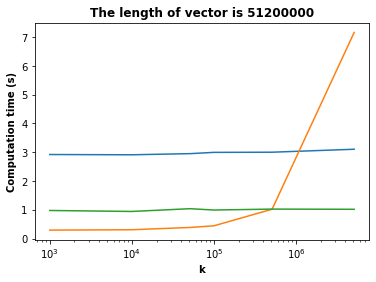

[102400.0, 1024000.0, 10240000.0, 1000, 10000, 100000]
[1000, 10000, 100000, 102400.0, 1024000.0, 10240000.0]
[0.7516709737399999, 2.0958975619199998, 16.87075621852, 0.5972744974099999, 0.59963513038, 0.7623851787900001]


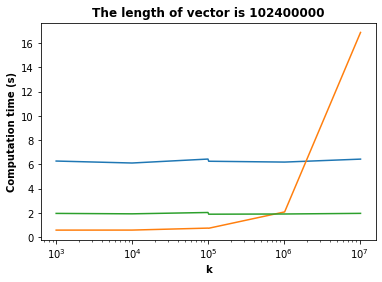

[160000.0, 1600000.0, 16000000.0, 1000, 10000, 100000]
[1000, 10000, 100000, 160000.0, 1600000.0, 16000000.0]
[1.2165199767900001, 4.278189471139999, 33.52838130644, 0.9268045985600003, 0.9706770651400001, 1.1625128707899999]


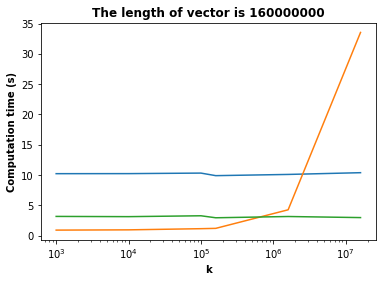

In [5]:
for dim in dims:
    ks_ = []
    for k in ks:
        if k<1:
            ks_.append(k*dim)
        else:
            ks_.append(k)
#     sorted(ks_)
    print(ks_)
    idx = sorted(range(len(ks_)), key=lambda k: ks_[k])
    ks_ = [ks_[i] for i in idx]
    print(ks_)
    x = [ks_ for i in range(3)]
    y = [[] for i in range(3)]
    e = [[] for i in range(3)]
    for k in ks:
        y[0].append(nth_enclaves[dim][k])
        y[1].append(heap_encalves[dim][k])
        y[2].append(nth_rams[dim][k])
        e[0].append(std_nth_enclaves[dim][k])
        e[1].append(std_heap_encalves[dim][k])
        e[2].append(std_nth_rams[dim][k])
    plt.figure()
    print(y[1])
    for i in range(3):
        y[i] = [y[i][j] for j in idx]
        plt.plot(ks_, y[i], label = labels[i])
#         plt.errorbar(x[i], y[i], e[i])
    plt.xlabel('k', fontweight='bold')
    plt.xscale('log')
    # Set the y axis label of the current axis.
    plt.ylabel('Computation time (s)', fontweight='bold')
    plt.title("The length of vector is "+str(dim), fontweight='bold')
    plt.show()